In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('matmul.csv')
df = df[df['dynamic'] == False]
df.drop(['dynamic'], axis=1, inplace=True)

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['usertime'] /= df['threads']
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df0 = df[df['busy'] == 0]

df

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,2.954963,0.026292,0.026305,1.000000,2.954963,112.390952
1,0,2,1.508702,0.012989,0.012951,0.997065,1.504274,116.154072
2,0,3,1.119531,0.009201,0.008788,0.955143,1.069313,121.673773
3,0,4,0.896905,0.006769,0.006572,0.970849,0.870759,132.495926
4,0,5,0.762221,0.005785,0.005324,0.920217,0.701409,131.754351
...,...,...,...,...,...,...,...,...
283,32,28,1.629399,0.008476,0.001290,0.152185,0.247970,192.232677
284,32,29,1.757598,0.009165,0.001320,0.144040,0.253165,191.772407
285,32,30,1.812155,0.009048,0.001321,0.145993,0.264563,200.275693
286,32,31,1.729621,0.008874,0.001272,0.143289,0.247836,194.900679


In [3]:
df_speedup = df.copy()

for col in df_speedup.columns[2:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup0 = df_speedup.loc[df_speedup['busy'] == 0]

df_speedup

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0,2,1.958613,2.024192,2.031147,1.002943,1.964378,0.967602
2,0,3,2.639464,2.857468,2.993135,1.046964,2.763423,0.923707
3,0,4,3.294623,3.883979,4.002567,1.030026,3.393549,0.848260
4,0,5,3.876778,4.544693,4.941147,1.086701,4.212897,0.853034
...,...,...,...,...,...,...,...,...
283,32,28,1.813529,3.101848,20.392096,6.570948,11.916607,0.584661
284,32,29,1.681251,2.868714,19.925840,6.942502,11.672087,0.586064
285,32,30,1.630635,2.905719,19.912858,6.849622,11.169233,0.561181
286,32,31,1.708445,2.962669,20.686295,6.978888,11.923050,0.576658


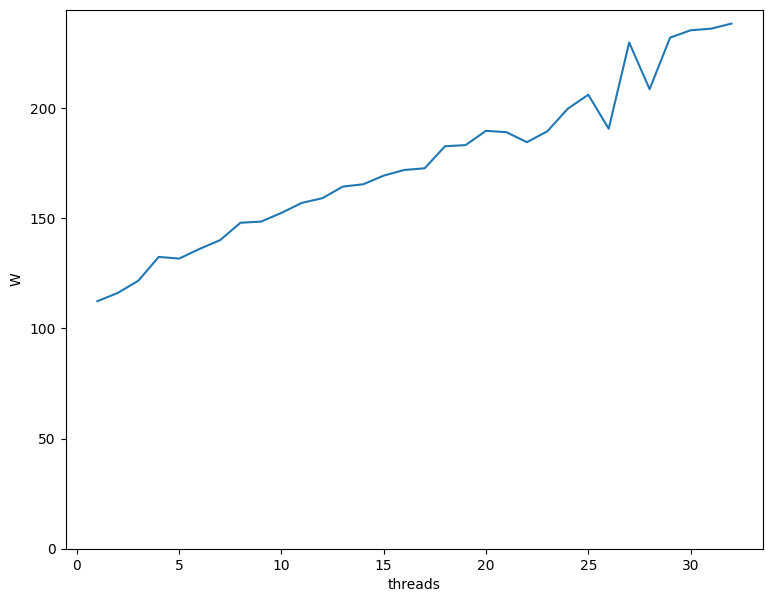

In [4]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(df0, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

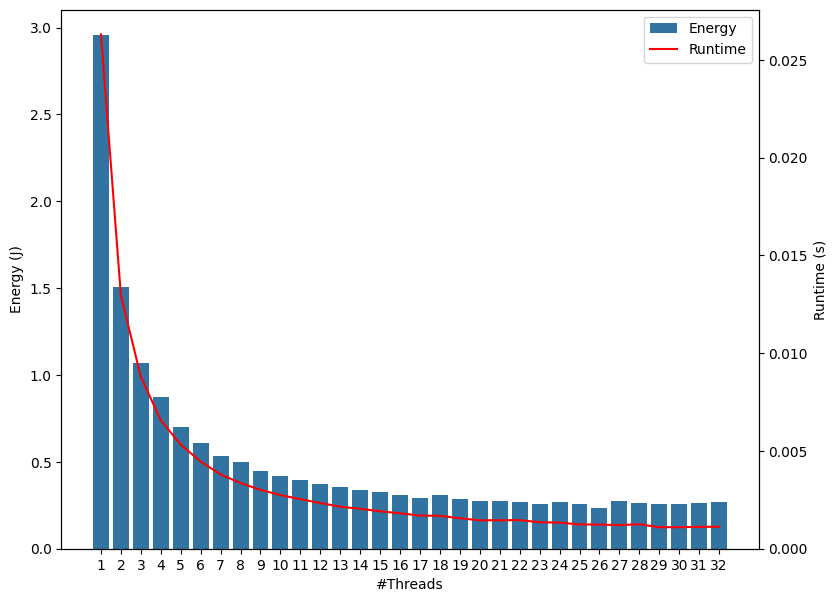

In [5]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df0, x=df0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy (J)')
ax2.set_ylabel('Runtime (s)')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

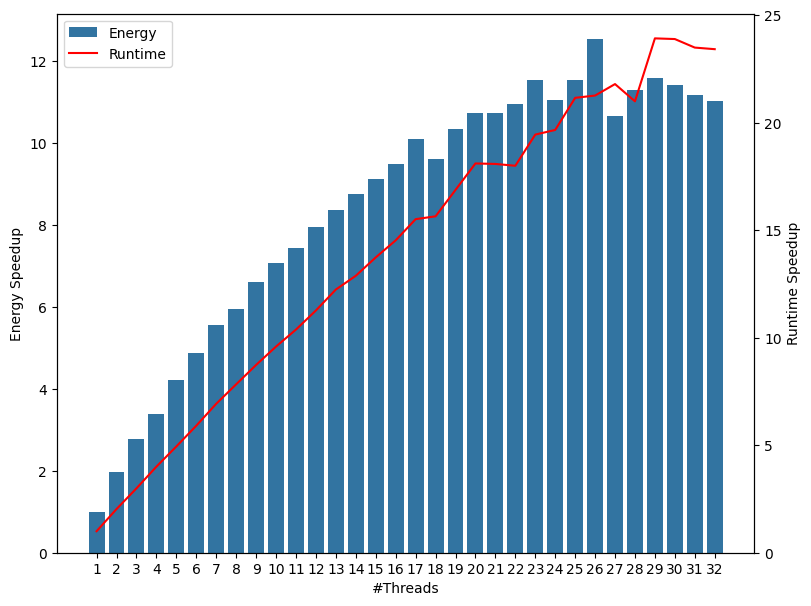

In [6]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df_speedup0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df_speedup0, x=df_speedup0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy Speedup')
ax2.set_ylabel('Runtime Speedup')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

# With busy threads

In [7]:
for (busy, df_busy) in df.groupby('busy'):
    best = df_busy[df_busy['energy'] == df_busy['energy'].min()].iloc[0]
    print(busy, '\t', int(best['threads']), '\t', best['energy'])

0 	 25 	 0.30426469
4 	 20 	 0.31924764
8 	 20 	 0.3516792
12 	 19 	 0.36920035
16 	 16 	 0.40643709
20 	 12 	 0.50005957
24 	 8 	 0.68927542
28 	 4 	 1.2685666
32 	 24 	 1.59083764


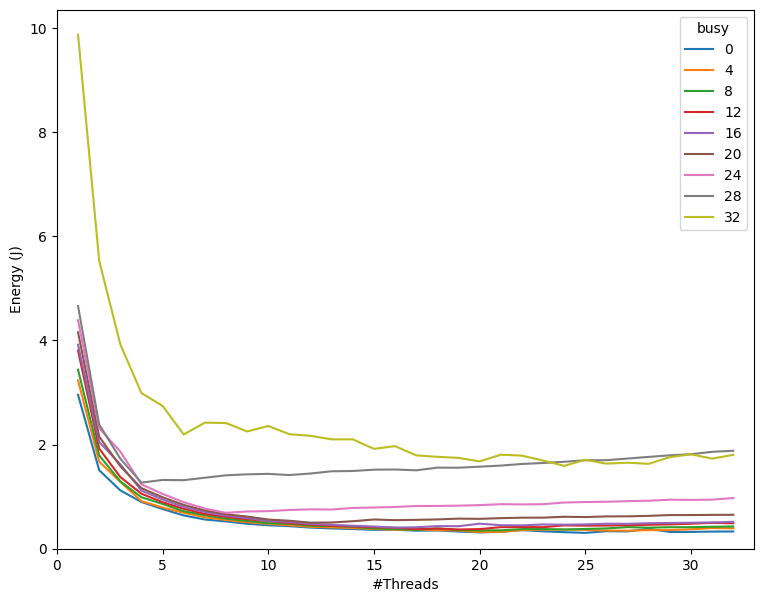

In [8]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='energy', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()

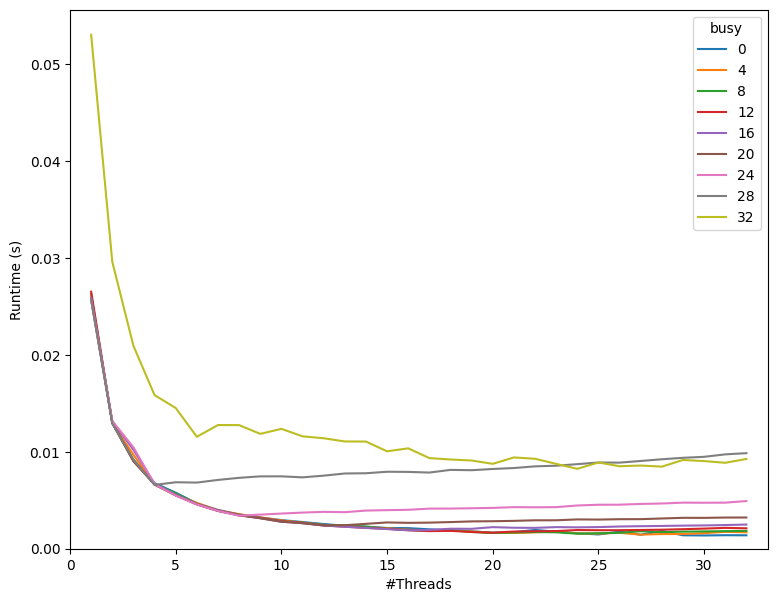

In [9]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='runtime', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Runtime (s)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()